# Stock Market Prediction using CNN-LSTM model
This project is about analysis of Stock Market and providing predictions to the stockholders. For this, we used CNN-LSTM approach to create a blank model, then use it to train on stock market data. Further implementation is discussed below...

In [40]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# Data Preprocessing and Analysis

In [41]:
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Before preprocessing data, a function to fetch real-time stock data (using Alpha Vantage API) is made

Then the datasets are loaded

In [42]:
data = pd.read_csv('C:/Users/hp/Untitled Folder/archive/COALINDIA.csv')
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2010-11-04,COALINDIA,EQ,245.00,291.00,344.9,291.00,342.0,342.55,327.29,479716245,1.570040e+16,NaN,187584905,0.3910
1,2010-11-05,COALINDIA,EQ,342.55,343.00,356.5,343.00,348.3,349.85,349.78,31927173,1.116747e+15,NaN,10894509,0.3412
2,2010-11-08,COALINDIA,EQ,349.85,351.80,355.9,329.50,331.4,330.75,335.19,46932779,1.573118e+15,NaN,16651623,0.3548
3,2010-11-09,COALINDIA,EQ,330.75,330.15,333.4,325.00,325.4,326.05,327.75,23741956,7.781383e+14,NaN,12977359,0.5466
4,2010-11-10,COALINDIA,EQ,326.05,325.40,327.8,320.05,321.3,322.80,323.78,21057129,6.817982e+14,NaN,6280335,0.2983


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2598 entries, 0 to 2597
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2598 non-null   object 
 1   Symbol              2598 non-null   object 
 2   Series              2598 non-null   object 
 3   Prev Close          2598 non-null   float64
 4   Open                2598 non-null   float64
 5   High                2598 non-null   float64
 6   Low                 2598 non-null   float64
 7   Last                2598 non-null   float64
 8   Close               2598 non-null   float64
 9   VWAP                2598 non-null   float64
 10  Volume              2598 non-null   int64  
 11  Turnover            2598 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  2598 non-null   int64  
 14  %Deliverble         2598 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 304.6

In [44]:
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2598.000000,2.598000e+03,2.598000e+03,2456.000000,2.598000e+03,2598.000000
mean,287.996555,288.234007,291.891744,284.240878,287.950943,287.953464,288.095708,5.617118e+06,1.405398e+14,53493.838355,2.783658e+06,0.551006
std,74.086926,74.132769,75.064219,73.238459,74.098662,74.144478,74.181016,1.105497e+07,3.292618e+14,30508.369833,4.497473e+06,0.143522
min,110.550000,110.850000,112.450000,109.550000,110.600000,110.550000,110.500000,2.143700e+04,7.734786e+11,612.000000,1.078600e+04,0.146300
25%,254.087500,254.737500,257.012500,251.187500,254.325000,254.087500,254.312500,2.236566e+06,6.921541e+13,33748.750000,1.240880e+06,0.456325
50%,299.950000,300.100000,303.925000,295.950000,300.000000,299.950000,300.290000,3.471441e+06,1.032340e+14,46755.000000,1.975260e+06,0.567700
75%,341.637500,341.200000,345.462500,336.137500,341.825000,341.637500,340.667500,6.321588e+06,1.596711e+14,64106.500000,3.233135e+06,0.654275
max,443.400000,445.000000,447.100000,437.000000,443.900000,443.400000,441.930000,4.797162e+08,1.570040e+16,351215.000000,1.875849e+08,0.936100


In [52]:
data=data[['Date','Open','High','Low','Close','Volume']]

In [53]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

Filling null columns with mean values....

In [54]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,Date,Open,High,Low,Close,Volume
0,2010-11-04,291.00,344.9,291.00,342.55,479716245
1,2010-11-05,343.00,356.5,343.00,349.85,31927173
2,2010-11-08,351.80,355.9,329.50,330.75,46932779
3,2010-11-09,330.15,333.4,325.00,326.05,23741956
4,2010-11-10,325.40,327.8,320.05,322.80,21057129


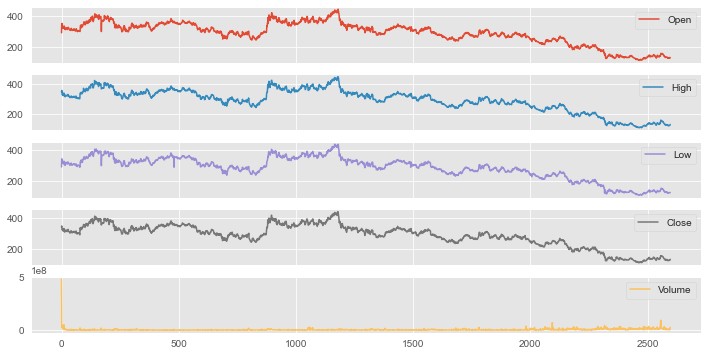

C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


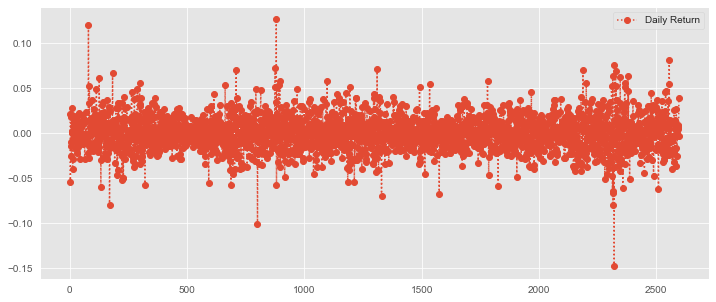

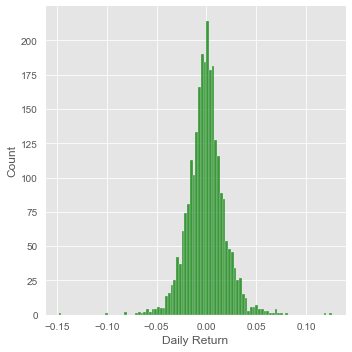

C:\Users\hp\anaconda3\lib\site-packages\pandas\core\series.py:4469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


            Date    Open    High     Low   Close     Volume  MA for 10 days  \
0     2010-11-04  291.00  344.90  291.00  342.55  479716245      288.152265   
1     2010-11-05  343.00  356.50  343.00  349.85   31927173      288.152265   
2     2010-11-08  351.80  355.90  329.50  330.75   46932779      288.152265   
3     2010-11-09  330.15  333.40  325.00  326.05   23741956      288.152265   
4     2010-11-10  325.40  327.80  320.05  322.80   21057129      288.152265   
...          ...     ...     ...     ...     ...        ...             ...   
2593  2021-04-26  127.75  128.00  126.50  126.95    4967884      126.550000   
2594  2021-04-27  127.00  127.90  126.60  127.50    3982954      126.350000   
2595  2021-04-28  128.00  129.45  127.50  128.50    6206074      126.730000   
2596  2021-04-29  129.75  130.05  127.65  128.05    8345584      126.740000   
2597  2021-04-30  127.40  134.60  127.00  133.05   27396950      127.220000   

      MA for 50 days  MA for 100 days  Daily Return

Date               0
Open               0
High               0
Low                0
Close              0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

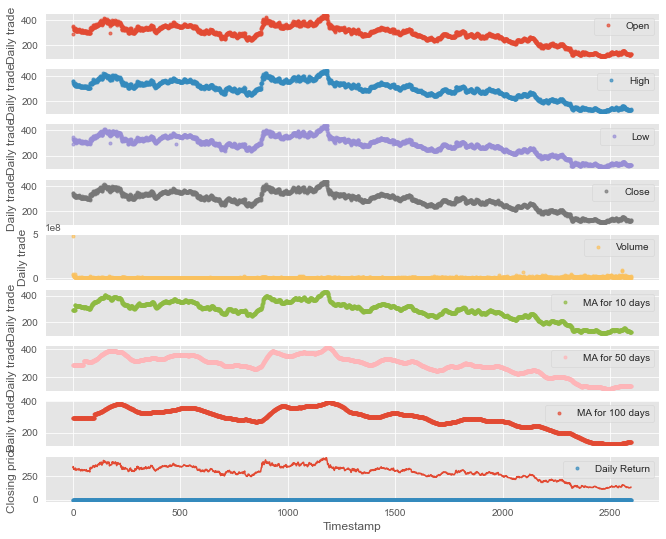

In [55]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

After that, we'll visualize the data for understanding, this is shown below...

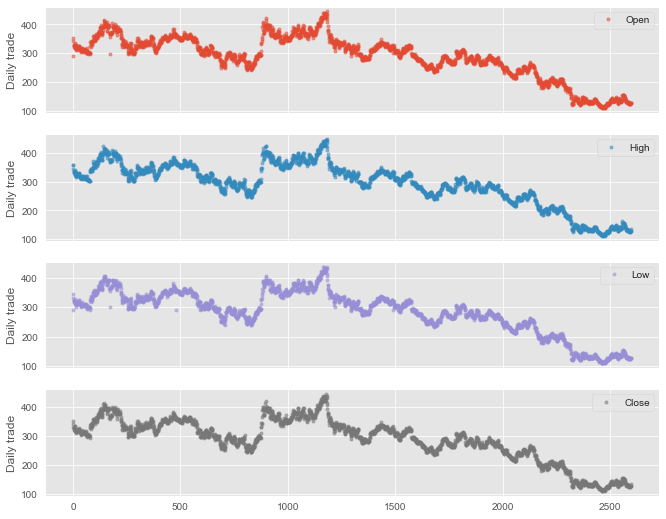

In [56]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Then we'd print the data after making changes and dropping null data

            Date    Open    High     Low   Close     Volume  MA for 10 days  \
0     2010-11-04  291.00  344.90  291.00  342.55  479716245      288.152265   
1     2010-11-05  343.00  356.50  343.00  349.85   31927173      288.152265   
2     2010-11-08  351.80  355.90  329.50  330.75   46932779      288.152265   
3     2010-11-09  330.15  333.40  325.00  326.05   23741956      288.152265   
4     2010-11-10  325.40  327.80  320.05  322.80   21057129      288.152265   
...          ...     ...     ...     ...     ...        ...             ...   
2593  2021-04-26  127.75  128.00  126.50  126.95    4967884      126.550000   
2594  2021-04-27  127.00  127.90  126.60  127.50    3982954      126.350000   
2595  2021-04-28  128.00  129.45  127.50  128.50    6206074      126.730000   
2596  2021-04-29  129.75  130.05  127.65  128.05    8345584      126.740000   
2597  2021-04-30  127.40  134.60  127.00  133.05   27396950      127.220000   

      MA for 50 days  MA for 100 days  Daily Return

,count,mean,std,min,25%,50%,75%,max
Open,2598.0,2.882340e+02,7.413277e+01,110.850000,2.547375e+02,3.001000e+02,3.412000e+02,4.450000e+02
High,2598.0,2.918917e+02,7.506422e+01,112.450000,2.570125e+02,3.039250e+02,3.454625e+02,4.471000e+02
Low,2598.0,2.842409e+02,7.323846e+01,109.550000,2.511875e+02,2.959500e+02,3.361375e+02,4.370000e+02
Close,2598.0,2.879535e+02,7.414448e+01,110.550000,2.540875e+02,2.999500e+02,3.416375e+02,4.434000e+02
Volume,2598.0,5.617118e+06,1.105497e+07,21437.000000,2.236566e+06,3.471441e+06,6.321588e+06,4.797162e+08
MA for 10 days,2598.0,2.881523e+02,7.351530e+01,113.055000,2.552762e+02,3.013875e+02,3.403375e+02,4.306850e+02
MA for 50 days,2598.0,2.891140e+02,7.119140e+01,118.498000,2.600400e+02,3.011930e+02,3.384735e+02,4.159810e+02
MA for 100 days,2598.0,2.903740e+02,6.836713e+01,125.018500,2.648845e+02,2.987795e+02,3.403170e+02,3.942485e+02
Daily Return,2598.0,-1.875411e-04,1.878515e-02,-0.148225,-1.048502e-02,-1.536354e-04,9.936605e-03,1.260857e-01


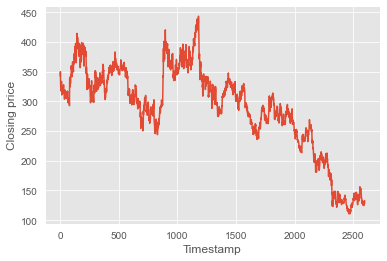

In [57]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

The data has been analysed but it must be converted into data of shape [100,1] to make it easier for CNN to train on... Else it won't select necessary features and the model will fail

In [58]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

1996
500


# Training part

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

In [59]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(100, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(100, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=40,batch_size=40, verbose=1, shuffle =True)

Epoch 1/40
50/50 [==============================] - 9s 45ms/step - loss: 0.0092 - mse: 0.0092 - mae: 0.0714 - val_loss: 0.0037 - val_mse: 0.0037 - val_mae: 0.0476
Epoch 2/40
50/50 [==============================] - 1s 19ms/step - loss: 0.0042 - mse: 0.0042 - mae: 0.0497 - val_loss: 0.0031 - val_mse: 0.0031 - val_mae: 0.0436
Epoch 3/40
50/50 [==============================] - 1s 19ms/step - loss: 0.0039 - mse: 0.0039 - mae: 0.0471 - val_loss: 0.0033 - val_mse: 0.0033 - val_mae: 0.0455
Epoch 4/40
50/50 [==============================] - 1s 20ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0444 - val_loss: 0.0029 - val_mse: 0.0029 - val_mae: 0.0421
Epoch 5/40
50/50 [==============================] - 1s 20ms/step - loss: 0.0035 - mse: 0.0035 - mae: 0.0447 - val_loss: 0.0026 - val_mse: 0.0026 - val_mae: 0.0396
Epoch 6/40
50/50 [==============================] - 1s 20ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0419 - val_loss: 0.0025 - val_mse: 0.0025 - val_mae: 0.0396
Epoch 7/40
50/50 [====

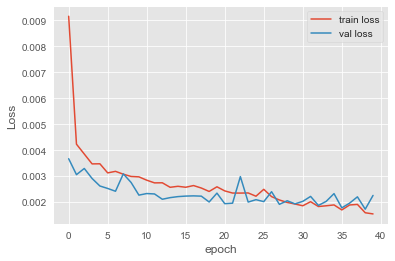

In [60]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

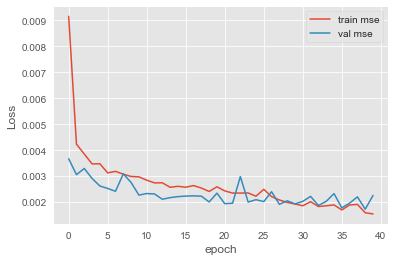

In [61]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

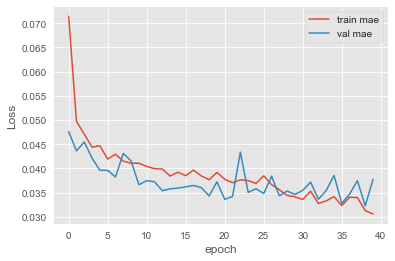

In [62]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [63]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_7 (TimeDist (None, 1, 98, 64)         256       
_________________________________________________________________
time_distributed_8 (TimeDist (None, 1, 49, 64)         0         
_________________________________________________________________
time_distributed_9 (TimeDist (None, 1, 47, 128)        24704     
_________________________________________________________________
time_distributed_10 (TimeDis (None, 1, 23, 128)        0         
_________________________________________________________________
time_distributed_11 (TimeDis (None, 1, 21, 64)         24640     
_________________________________________________________________
time_distributed_12 (TimeDis (None, 1, 10, 64)         0         
_________________________________________________________________
time_distributed_13 (TimeDis (None, 1, 640)           

In [64]:
model.evaluate(test_X, test_Y)

16/16 [==============================] - 0s 4ms/step - loss: 0.0023 - mse: 0.0023 - mae: 0.0378


[0.002256642561405897, 0.002256642561405897, 0.037760913372039795]

In [65]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.904963
R2 Score: 0.904963
Max Error: 0.178317


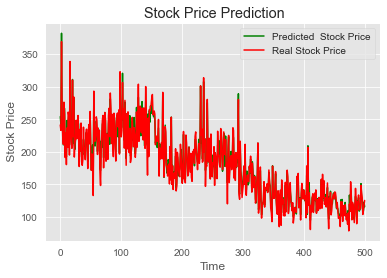

In [66]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing part

In this part, the model is saved and loaded back again. Then, it's made to train again but with different data to check it's loss and prediction

In [67]:
# First we need to save a model
model.save("model.h5")

In [68]:
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [69]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_7 (TimeDist (None, 1, 98, 64)         256       
_________________________________________________________________
time_distributed_8 (TimeDist (None, 1, 49, 64)         0         
_________________________________________________________________
time_distributed_9 (TimeDist (None, 1, 47, 128)        24704     
_________________________________________________________________
time_distributed_10 (TimeDis (None, 1, 23, 128)        0         
_________________________________________________________________
time_distributed_11 (TimeDis (None, 1, 21, 64)         24640     
_________________________________________________________________
time_distributed_12 (TimeDis (None, 1, 10, 64)         0         
_________________________________________________________________
time_distributed_13 (TimeDis (None, 1, 640)           

In [ ]:
# For data preprocessing and analysis part

data2 = pd.read_csv('C:/Users/hp/Untitled Folder/archive//SBIN.csv')

data2.dropna(inplace=True)
data2=data2[['Date','Open','High','Low','Close','Volume']]
data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()
df2 = data2.drop('Date', axis=1)

print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)

    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

         Open     High      Low    Close    Volume
0     2308.80  2337.00  2301.00  2329.20   2542464
1     2308.00  2349.80  2294.00  2334.20   1990668
2     2334.70  2356.00  2301.00  2312.50   1572901
3     2303.00  2321.90  2272.40  2317.15   1340553
4     2313.40  2336.70  2305.10  2320.10   1252690
...       ...      ...      ...      ...       ...
2451   339.25   347.45   339.25   344.30  49234985
2452   344.00   354.95   342.40   353.05  46003023
2453   357.00   364.30   356.05   363.40  56696255
2454   365.00   369.95   355.50   359.40  63692926
2455   353.45   362.50   350.45   353.50  53832840

[2456 rows x 5 columns]


In [71]:
model.evaluate(test_X, test_Y)

15/15 [==============================] - 0s 4ms/step - loss: 1.4948 - mse: 1.4948 - mae: 0.8557


[1.4947762489318848, 1.4947762489318848, 0.8556934595108032]

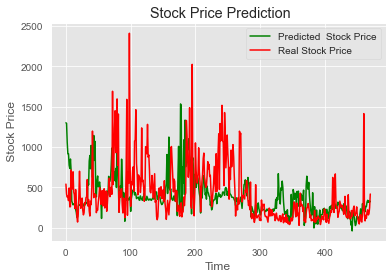

In [72]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()